In [31]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")
from importlib import reload
import FunctionFor_dE_dx
reload(FunctionFor_dE_dx)

<module 'FunctionFor_dE_dx' from '/scratchfs/juno/luoxj/JUNO_G4_Simulation/FunctionFor_dE_dx.py'>

In [32]:
from LoadMultiFiles import LoadOneFileUproot
from FunctionFor_dE_dx import GetNPE
from copy import copy
filter_leaves = ['xyz_center', 'step_x', 'step_y', 'step_z',  'step_Edep', 'step_Equench', 'step_KineticE']

template_root_path = "/afs/ihep.ac.cn/users/l/luoxj/JUNO_G4_Simulation/optical_run/run_diff_L_LS/alpha_{}mm.root"

v_L_LS = [1, 2, 3, 5, 10, 15, 20]
dir_PMT_diff_L_LS = {}
for L_LS in v_L_LS:
    dir_PMT_diff_L_LS[L_LS] = LoadOneFileUproot(template_root_path.format(L_LS), name_branch="PMT_log", return_list=False, list_branch_filter=filter_leaves)

Text(0.5, 1.0, '$PMT_{near}=1cm$')

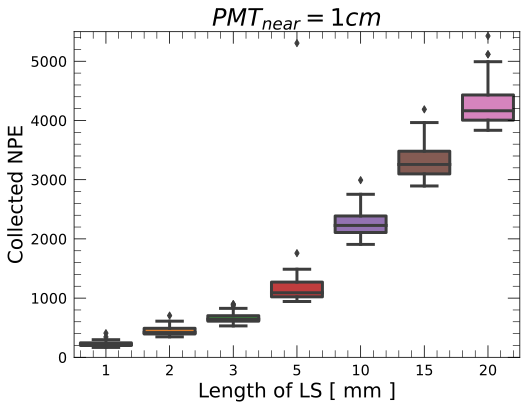

In [36]:
v_NPE = []
v_L_LS = np.array(list(dir_PMT_diff_L_LS.keys()))
v_std = []
dir_nPE = {"NPE":[], "L_LS":[]}
for key,dir_PMT in dir_PMT_diff_L_LS.items():
    v_NPE.append(GetNPE(dir_PMT))
    v_NPE_tmp = GetNPE(dir_PMT, mean=False)
    dir_nPE["NPE"] += v_NPE_tmp
    dir_nPE["L_LS"] += [key]*len(v_NPE_tmp)
# plt.errorbar( v_L_LS, v_NPE, label="Simulation",marker=".",color="black", Ls="None")

import pandas as pd
import seaborn as sns
sns.boxplot(x="L_LS", y="NPE", data=pd.DataFrame.from_dict(dir_nPE))
plt.ylim(0, 5500)

# from scipy.optimize import curve_fit
# def func(x, k, b):
#     return k*x + b
# popt,pcov = curve_fit(func, v_L_LS, v_NPE, sigma=np.sqrt(v_NPE))
# plt.plot(v_L_LS, func(v_L_LS, *popt), label=f"y = {popt[0]:.2f}*x{popt[1]:.2f}")
# plt.legend()

plt.xlabel("Length of LS [ mm ]")
plt.ylabel("Collected NPE")
plt.title("$PMT_{near}=1cm$")



In [37]:
print(dir_PMT.keys())
pd.DataFrame.from_dict(dir_nPE)

dict_keys(['Edep_event', 'evtID', 'step_pdgID', 'step_trackID', 'step_t', 'step_dx', 'step_chamberID', 'step_isCherenkov'])


,NPE,L_LS
0,197,1
1,209,1
2,190,1
3,248,1
4,168,1
...,...,...
415,4048,20
416,3965,20
417,4209,20
418,4379,20
